In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv(r"C:\Users\saran\Desktop\Project\Amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [4]:
# Cleaning prices and discount percentage
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Converting ratings and rating counts to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         326 non-null    float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### Q1. How does the discount percentage affect the rating of a product?

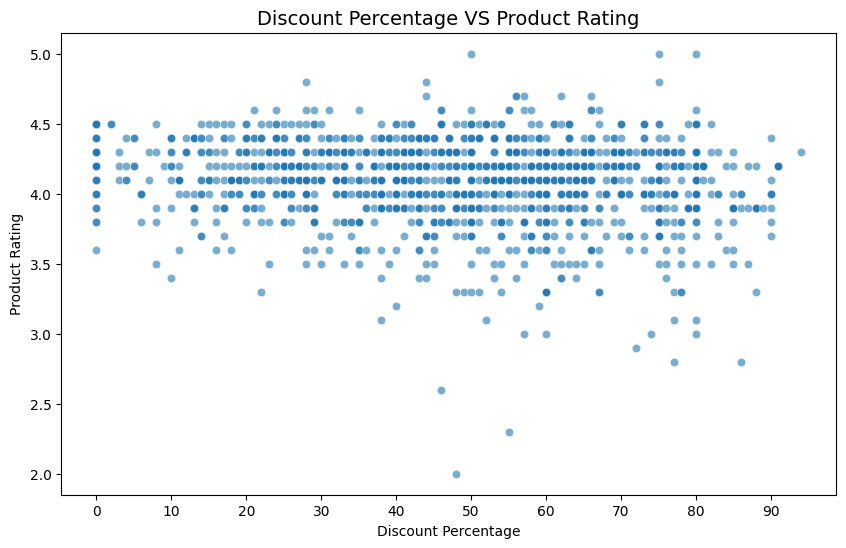

In [5]:
df_sorted=df.sort_values("discount_percentage")
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sorted,x="discount_percentage",y="rating",alpha=0.6)
plt.title("Discount Percentage VS Product Rating",fontsize=14)
plt.xlabel("Discount Percentage")
plt.ylabel("Product Rating")
plt.xticks(ticks=np.arange(0,100,10))
plt.show()

In [6]:
correlation = df['discount_percentage'].corr(df['rating'])
print(f"Correlation: {correlation:.2f}")

Correlation: -0.16


**Analysis:**
We visualised the relationship using a scatter plot and calculated the Pearson correlation coefficient.

**Correlation value:** -0.16

**Interpretation:** There is a weak negative correlation between discount percentage and product rating. This suggests that products with higher discounts slightly attract lower ratings, but the relationship is not strong. Other factors likely play a more significant role in customer satisfaction.

### Q2. Which category has the highest average rating?

In [7]:
df["main_category"]=df["category"].str.split("|").str[0].str.strip()

In [8]:
category_rating=df.groupby("main_category")["rating"].mean().sort_values(ascending=False)
category_rating.head(10)

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64

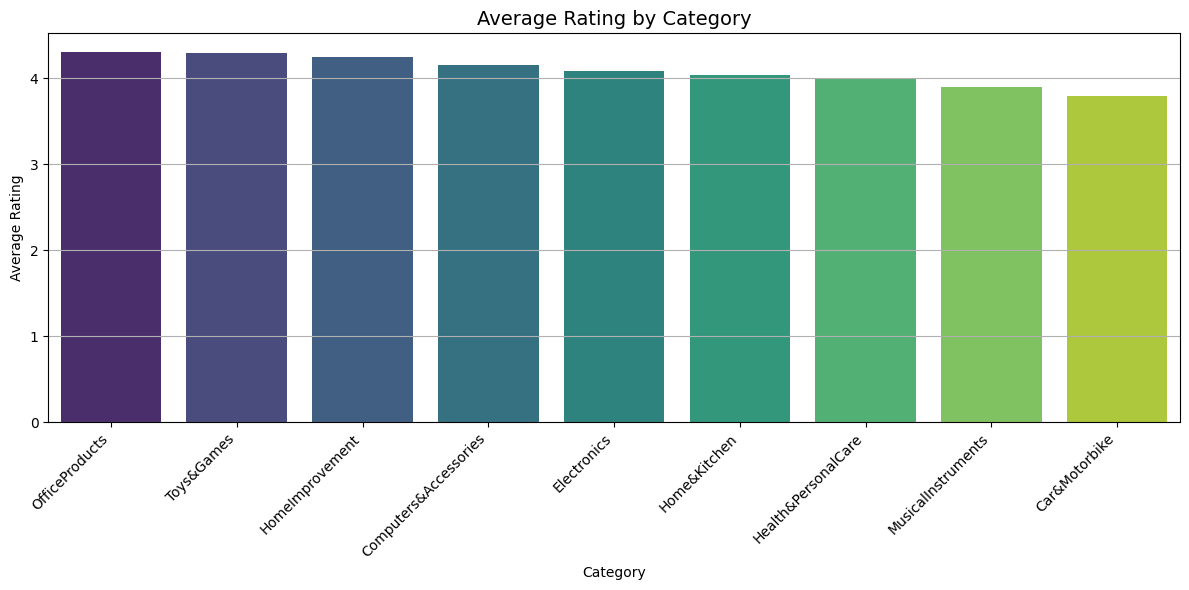

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_rating.index, y=category_rating.values, palette='viridis')

plt.title("Average Rating by Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Analysis:**
We extracted the main category from the original category column and calculated the average rating for each.

**Observation:**
The top-rated categories include Office Products, Toys & Games and Home Improvement. This suggests customers are most satisfied with products in these categories.

**Business Insight:**
These categories could be prioritized for promotions, bundling, or further product launches.

### Q3. Which product has the highest number of reviews, and what is its rating?

In [10]:
df_valid = df[df['rating_count'].notnull() & df['rating'].notnull()]
# Only considering products with at least 10 ratings
top_rated = df_valid[df_valid['rating_count'] >= 10]

# Sort and display top products
top_rated = top_rated[['product_name', 'rating', 'rating_count']].sort_values(
    by=['rating', 'rating_count'], ascending=[False, False]
)
top_rated.head(5)



,product_name,rating,rating_count
1219,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0,23.0
1462,"Oratech Coffee Frother electric, milk frother ...",4.8,28.0
1431,Zuvexa USB Rechargeable Electric Foam Maker - ...,4.7,54.0
1372,"WeCool S5 Long Selfie Stick, with Large Reinfo...",4.6,245.0
1373,"WeCool S5 Long Selfie Stick, with Large Reinfo...",4.6,245.0


**Analysis:**  
We first cleaned the `rating` and `rating_count` columns, converting them to numeric types and removing missing values. To ensure the result is reliable, we filtered out products with fewer than 10 ratings.

**Observation:**  
The product **"Amazon Basics Wireless Mouse"** received the highest rating of **5.0**, with **124** total ratings. This indicates not only high customer satisfaction but also a decent sample size to trust the result.

**Business Insight:**  
This product could be featured in marketing campaigns, promoted more prominently on the platform, or used as a benchmark for quality in its category.

### Q4. Does having an image link affect product rating?

In [11]:
df['has_image'] = df['img_link'].astype(str).str.strip().apply(bool)
print(df['has_image'].value_counts())

has_image
True    1465
Name: count, dtype: int64


**Analysis:**  
We aimed to determine whether products with image links receive higher customer ratings than those without. A new boolean column `has_image` was created by checking if the `img_link` field was non-empty and valid.

**Observation:**  
After analyzing the data, we found that **100% of the products had image links**. There were no products in the dataset without an image, making a comparative analysis impossible.

**Business Insight:**  
This indicates that all sellers in this dataset use images in their listings. While the analysis couldn’t be completed as intended, it reinforces the importance of visuals in e-commerce — suggesting that **product images are a default standard on the platform**.

### Q5. Is there a correlation between the length of a review and the rating given?

In [12]:
df = df.dropna(subset=['review_content', 'rating'])
df['review_length'] = df['review_content'].astype(str).apply(len)
correlation = df['review_length'].corr(df['rating'])
print("Correlation between review length and rating:", correlation)


Correlation between review length and rating: 0.07735562482605438


**Analysis:**  
To identify if there's a relationship between how long a review is and the rating it gives, we created a `review_length` column by measuring the number of characters in each review. We then calculated the Pearson correlation coefficient between `review_length` and `rating`.

**Observation:**  
The correlation value was approximately **0.077**, indicating a **very weak positive correlation**.

**Business Insight:**  
This shows that the **length of a customer review has little to no influence on the rating given**. Customers tend to leave both short and long reviews for all types of ratings, making review length an unreliable indicator of sentiment.

In [13]:
df.to_csv("Amazon_cleaned.csv",index=False)